# Final exercise: CO2 Emissions - Version 2


By: Jelle van den Elsen

Date of submission: 04-06-2024

## Part 1: preparations

To get an idea about the CO2 emissions and the future of non-fossil fuels we first need to prepare some data for our report. The first step will be to import some modules which will help us with importing and manipulating data sets:

In [40]:
# install modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

The report should shed some light on three topics:
1. What is the biggest predictor of a large CO2 output per capita of a country?
2. Which countries are making the biggest strides in decreasing CO2 output?
3. Which non-fossil fuel energy technology will have the best price in the future?

There is a bunch of open data on the ourworldindata website (https://ourworldindata.org/). To answer the first question we will import the CO2 emisions per capita dataset. Then we need some data on the predictors, for this I chose some data that covers the same years and countries as the CO2 emissions dataset. The five predictors I chose are: 
- Median income after tax. Hypothesis: countries with higher incomes consume more and thus emit more emissions.
- Share of individuals using the internet. Hypothesis: a higher share of internet usage could indicate a more developed country which usually have more emisions. 
- Trade. Hypothesis: countries that trade more emit more CO2. 
- Employment in industry. Hypothesis: more work in the industry sector could lead to more CO2 emisions since this industry is quite 'dirty'. 
- GDP growth. Hypothesis: in line with median income, countries with higher GDP often consume more and thus emit more CO2. 

The second question is easier, we only have to look at the CO2 emmisions per capita dataset since this data includes observations for a lot of years. So a country that is makes the biggest strides will have lowered their CO2 emissions the most over the years.

For the third question we need data on energy prices of several different non fossil fuel energy sources. This data can be found on: https://www.ipcc.ch/




In [41]:
# import datasets from ourworldindata
co2 = pd.read_csv('https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/co-emissions-per-capita.csv')
income = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/median-income-after-tax-lis.csv")
internet = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/share-of-individuals-using-the-internet.csv")
trade = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/trade-as-share-of-gdp.csv")
industry = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/industry-share-of-total-emplyoment.csv")
gdp_growth = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/annual-gdp-growth.csv")

energy_prices = pd.read_csv('https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/01_SPM3_costs_adoption.csv')
# Check data
display(income)
display(co2)

,Entity,Code,Year,"Median (Disposable household income, equivalized)"
0,Australia,AUS,1981,21880.08
1,Australia,AUS,1985,21807.39
2,Australia,AUS,1989,22009.95
3,Australia,AUS,1995,20206.26
4,Australia,AUS,2001,22712.27
...,...,...,...,...
749,Vietnam,VNM,2005,4776.31
750,Vietnam,VNM,2007,5786.49
751,Vietnam,VNM,2009,6242.77
752,Vietnam,VNM,2011,7335.61


,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.00
1,Afghanistan,AFG,1950,0.01
2,Afghanistan,AFG,1951,0.01
3,Afghanistan,AFG,1952,0.01
4,Afghanistan,AFG,1953,0.01
...,...,...,...,...
26595,Zimbabwe,ZWE,2018,0.71
26596,Zimbabwe,ZWE,2019,0.64
26597,Zimbabwe,ZWE,2020,0.50
26598,Zimbabwe,ZWE,2021,0.52



We can see from the output that the income data has way less rows than the co2 data, something to keep in mind when merging the data (merged data will have probably have less rows since we merge based on 'inner', considering both Year and Entity). Merging the data is luckily quite easy since all the datasets of OurWorldInData have the same column names. In this case we will use Entity, Year and Code to merge on. 

In [32]:
# merging the data

# nerge 'co2' and 'income' DataFrames based on 'Entity' and 'Year' and 'Code'
merged_data = co2.merge(income, how="inner", on=["Entity", "Year", "Code"])

# now use the merged_data dataframe from above to merge the rest of the data
merged_data = merged_data.merge(internet, how="inner", on=["Entity", "Year", "Code"])
merged_data = merged_data.merge(trade, how="inner", on=["Entity", "Year", "Code"])
merged_data = merged_data.merge(industry, how="inner", on=["Entity", "Year", "Code"])
merged_data = merged_data.merge(gdp_growth, how="inner", on=["Entity", "Year", "Code"])

# # sidenote: could probably make the code above more tidy and efficient using a loop and a list like so:
# dataframes_to_merge = [income, internet, trade, industry, gdp_growth]
# merged_data = co2.copy()  
# for df in dataframes_to_merge:
#     merged_data = merged_data.merge(df, how="inner", on=["Entity", "Year", "Code"])


# check the resulting merged DataFrame
merged_data

,Entity,Code,Year,Annual CO₂ emissions (per capita),Percentage Change,"Median (Disposable household income, equivalized)",Individuals using the Internet (% of population),Trade (% of GDP),"Industry as % of total employment -- ILO modelled estimates, May 2017",17.13.1 - Annual GDP growth (%) - NY_GDP_MKTP_KD_ZG
0,Australia,AUS,1995,16.94,2.73,20206.26,2.76,37.71,22.80,3.89
1,Australia,AUS,2001,18.59,1.00,22712.27,52.69,44.25,20.96,2.04
2,Australia,AUS,2008,19.03,-0.84,31256.07,71.67,42.86,21.62,3.57
3,Australia,AUS,2010,18.42,-2.10,31053.91,76.00,40.52,20.95,2.21
4,Australia,AUS,2014,16.75,-3.06,33399.60,84.00,42.47,22.10,2.58
...,...,...,...,...,...,...,...,...,...,...
564,Vietnam,VNM,2005,1.15,6.69,4776.31,12.74,130.71,18.80,7.55
565,Vietnam,VNM,2007,1.20,0.81,5786.49,20.76,154.61,21.14,7.13
566,Vietnam,VNM,2009,1.44,7.80,6242.77,26.55,134.71,21.11,5.40
567,Vietnam,VNM,2011,1.73,8.15,7335.61,35.07,125.26,21.17,6.41


As we can see the merged_data has 569 rows after all the merges, most likely due to the fact that the income data is quite limited (few rows). We also need to make the dataset a bit tidier for readability. Lets start with the biggest issue: the column names are waaaay too long. Secondly lets make all the data be displayed with only 2 decimals. 

Other than that the data looks tidy: there is no missing data, there is data for multiple countries and multiple years and the data is merged correctly.

In [33]:
# change column names
new_column_names = {
    'Annual CO₂ emissions (per capita)': 'CO2_per_capita',
    'Median (Disposable household income, equivalized)': 'Median_income',
    'Individuals using the Internet (% of population)': 'Internet_usage',
    'Trade (% of GDP)': 'Trade_GDP',
    'Industry as % of total employment -- ILO modelled estimates, May 2017': 'Industry_employment',
    '17.13.1 - Annual GDP growth (%) - NY_GDP_MKTP_KD_ZG': 'GDP_growth'
}

# renaming columns
merged_data = merged_data.rename(columns=new_column_names)
display(merged_data)

# set display format to show 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

,Entity,Code,Year,CO2_per_capita,Percentage Change,Median_income,Internet_usage,Trade_GDP,Industry_employment,GDP_growth
0,Australia,AUS,1995,16.94,2.73,20206.26,2.76,37.71,22.80,3.89
1,Australia,AUS,2001,18.59,1.00,22712.27,52.69,44.25,20.96,2.04
2,Australia,AUS,2008,19.03,-0.84,31256.07,71.67,42.86,21.62,3.57
3,Australia,AUS,2010,18.42,-2.10,31053.91,76.00,40.52,20.95,2.21
4,Australia,AUS,2014,16.75,-3.06,33399.60,84.00,42.47,22.10,2.58
...,...,...,...,...,...,...,...,...,...,...
564,Vietnam,VNM,2005,1.15,6.69,4776.31,12.74,130.71,18.80,7.55
565,Vietnam,VNM,2007,1.20,0.81,5786.49,20.76,154.61,21.14,7.13
566,Vietnam,VNM,2009,1.44,7.80,6242.77,26.55,134.71,21.11,5.40
567,Vietnam,VNM,2011,1.73,8.15,7335.61,35.07,125.26,21.17,6.41


## Part 2: the exercises

### Exercise 1: Biggest predictor of CO2 output

There are multiple ways to determine the biggest predictor of CO2 output. We will look at two ways: correlations and regression. Lets start with the simpler way to look at this problem: using correlations. The higher the correlation (0 to 1), the bigger the relationship is between the two variables. NOTE: correlations does not mean a causation! Lets check for each independent variable (trade, internet, industry, gdp growth and income) and their correlations with the dependent variable (co2 emissions).

In [14]:
# biggest predictor of CO2 emmissions per capita
# calculate correlation coefficients between CO2 emissions and each predictor variable
correlation_trade = merged_data['CO2_per_capita'].corr(merged_data['Trade_GDP'])
correlation_internet = merged_data['CO2_per_capita'].corr(merged_data['Internet_usage'])
correlation_industry = merged_data['CO2_per_capita'].corr(merged_data['Industry_employment'])
correlation_gdp_growth = merged_data['CO2_per_capita'].corr(merged_data['GDP_growth'])
correlation_income = merged_data['CO2_per_capita'].corr(merged_data['Median_income'])

# print correlation coefficients
print("Correlation with CO2 emissions:")
print(f"Trade: {correlation_trade}")
print(f"Internet: {correlation_internet}")
print(f"Industry: {correlation_industry}")
print(f"GDP Growth: {correlation_gdp_growth}")
print(f"Income: {correlation_income}")


Correlation with CO2 emissions:
Trade: 0.323718478114301
Internet: 0.1464935819960724
Industry: 0.15649287505238552
GDP Growth: -0.08159100322335555
Income: 0.7139143631846131


Based on the output we can see that income is the biggest predictor with a correlation of approximately 0.71. This means that there is quite a strong relationsship between how much people earn on average in a country and the amount of Co2 that country puts out. This is in line with our hypothesis. Surprisingly GDP growth has a very small negative correlation and thus no relationship with CO2 emissions. This is not what we expected in our hypothesis and is thus rejected.

To get a better look at these correlations and compare them, lets put them in a bar graph:

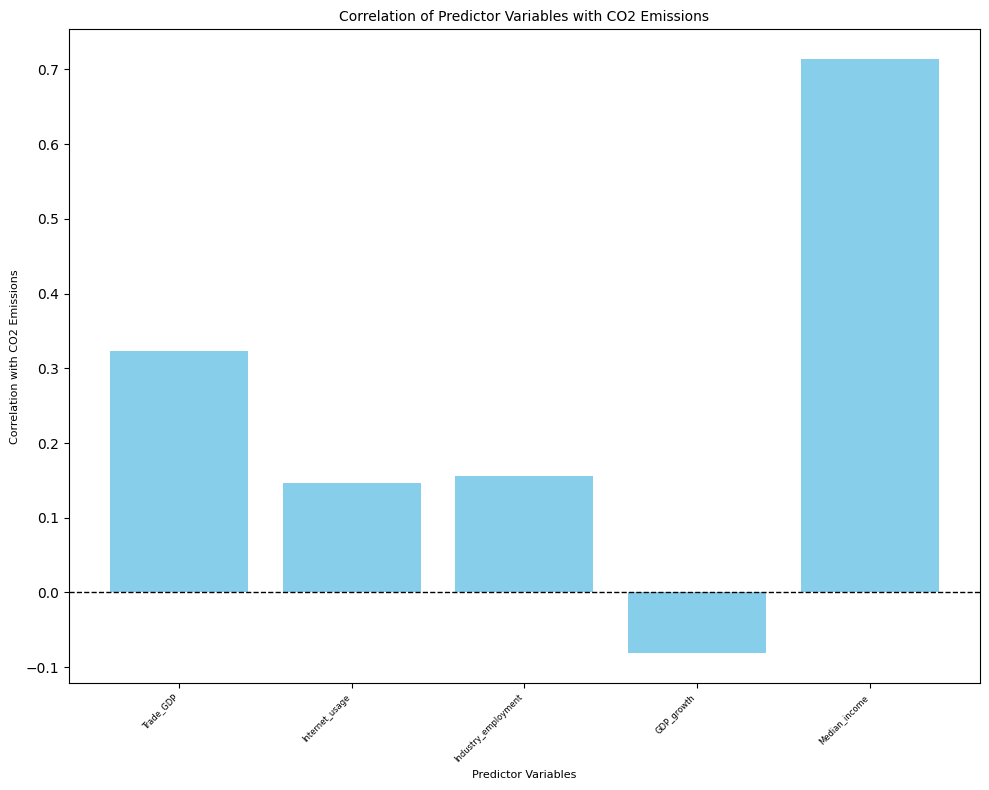

In [34]:
# now to visualise the data using a graph:
# lets plot a bar graph where the correlation coefficients are on the y-axis and the predictor variables are on the x-axis:
# list of predictor variables and their correlations
predictor_variables = [
    'Trade_GDP',
    'Internet_usage',
    'Industry_employment',
    'GDP_growth',
    'Median_income']
correlation_values = [correlation_trade, correlation_internet, correlation_industry, correlation_gdp_growth, correlation_income]

# create bar graph
mpl.figure(figsize=(10, 8))
mpl.bar(predictor_variables, correlation_values, color='skyblue')

# add labels and title
mpl.xlabel('Predictor Variables', fontsize = 8)
mpl.ylabel('Correlation with CO2 Emissions', fontsize = 8)
mpl.title('Correlation of Predictor Variables with CO2 Emissions', fontsize = 10)

# rotate x-axis labels for better readability
mpl.xticks(rotation=45, ha='right', fontsize = 6)

# add horizontal line at y=0
mpl.axhline(y=0, color='black', linestyle='--', linewidth=1)

# show plot
mpl.tight_layout()
mpl.show()

Now for the second method: regression analysis. We are going to use a multivariate model, which means that each of the five independent variables are regressed on the dependent variable simultaneously. The advantage of this is that it takes into account not only the correlations between co2 emisssions but also with the correlations between the independent variables. Something that is not clear when looking at just the correlations. This direct comparison also tells us much more about the actual strength and significance of the variables and is a better method to determine the biggest predictor.

In [19]:
# lets also look a a proper regression analysis to see which is the biggest predictor 
# import module for convenient regression analysis
import statsmodels.api as sm

# define the predictor variables and the target variable
predictors = [
    'Trade_GDP',
    'Internet_usage',
    'Industry_employment',
    'GDP_growth',
    'Median_income']
target = 'CO2_per_capita'

# extract predictor and target variable data from the dataframe
X = merged_data[predictors]
y = merged_data[target]

# add a constant term for the intercept
X_with_const = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# print the regression summary which includes coefficients and p-values
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         CO2_per_capita   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          3.54e-105
Time:                        15:34:59   Log-Likelihood:                -1550.2
No. Observations:                 569   AIC:                             3112.
Df Residuals:                     563   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7483    

As we can see from the output: all the explanatory variables are significant (p<0.05) moreover, the t-value of median disposable household income is exeptionally large and the standard error is very low compared to the other variables this is in line with what we saw earlier (correlation of 0.71), income is the strongest predictor once again!

For interpretation we could say that for each 1 euro increase in the median household income, the annual co2 emissions per capita increases by 0.0004. 

### Exercise 2: Which countries are making the biggest strides in decreasing CO2 output?


For this exercise we only need co2 column. Because we have so many countries, lets try to narrow it down to 10 for plotting purposes later. 

We will do this by looking at the percentage change in Annual CO₂ emissions per year and taking the mean across all years. We do this because if we only look at the latest 10 years for example, a country could look very good because it reduced their CO2 alot. However, if the same country increased their CO2 emissions by a lot 20 years ago this would be bad. So we take the average of all the changes in annual CO2.

In the code we ask Python to return the 10 countries with the lowest mean CO2 emissions to narrow down the amount of countries.

In [38]:
# calculate the percentage change in CO2 emissions per capita for each country
co2['Percentage Change'] = co2.groupby('Entity')['Annual CO₂ emissions (per capita)'].pct_change() * 100
co2_no_na = co2.dropna(subset=['Percentage Change'])

# calculate the average percentage change
average_percentage_change = co2_no_na.groupby('Entity')['Percentage Change'].mean()

# see the average percentage change per country, the lower the better, 
# preferably a negative number (means reduction in CO2 across all years)
average_percentage_change

# filter the data to get 10 countries with the lowest average percentage change
lowest_average_percentage_change = average_percentage_change.nsmallest(10)

# display the result
print(lowest_average_percentage_change)

Entity
Zambia                     -0.61
Nauru                       0.21
Micronesia (country)        0.69
Malawi                      0.77
United Kingdom              1.11
Belgium                     1.25
Turks and Caicos Islands    1.36
Anguilla                    1.52
New Zealand                 1.75
Europe (excl. EU-27)        1.87
Name: Percentage Change, dtype: float64


As we can see Zambia is the only country where they are making the best progress to reduce CO2 emissions across all years. Ofcourse this does not tell the whole story: there might be fewer data on Zambia, Zambia is a developing country so they might have fewer CO2 emissions to begin with etc. But the purpose of this course is to learn Python, not to provide accurate analysis, so lets keep it like this :)

Also, the visualisation might shed some more light on this issue.
Lets plot a line graph showing the trends for these 9 countries. We chose 9 countries because the 10th country is Europe (see last output), which is not a country.

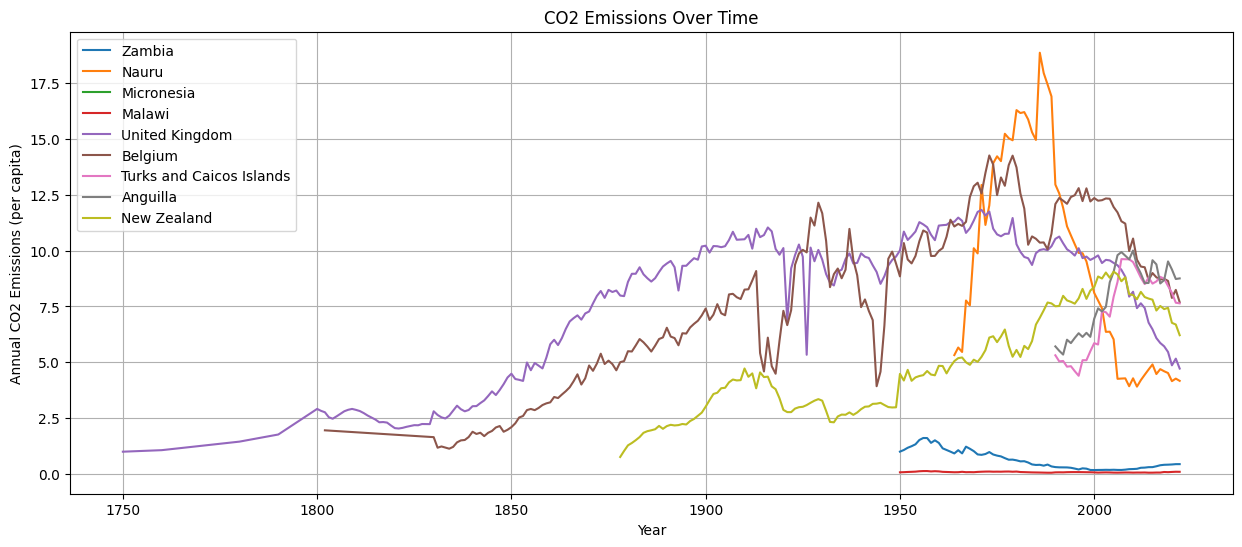

In [39]:
# now lets plot the data on the line graph and change te size
mpl.figure(figsize=(15, 6)) 

# lets select only the top 10 (top 9 in this case since #10 is the whole of Europe) countries to plot, from the last block of code
entities_of_interest = ['Zambia', 'Nauru', 'Micronesia', 'Malawi', 'United Kingdom',
                        'Belgium', 'Turks and Caicos Islands', 'Anguilla', 'New Zealand']

# filter the co2 dataframe to include only the rows where the 'Entity' column matches the entities of interest
filtered_co2 = co2[co2['Entity'].isin(entities_of_interest)]

# create the line plot
for entity in entities_of_interest:
    entity_data = filtered_co2[filtered_co2['Entity'] == entity]
    mpl.plot(entity_data['Year'], entity_data['Annual CO₂ emissions (per capita)'], label=entity)

# customize the plot 
mpl.title('CO2 Emissions Over Time')
mpl.xlabel('Year')
mpl.ylabel('Annual CO2 Emissions (per capita)')
mpl.grid(True) 
mpl.legend()  

# show the plot
mpl.show()

As we suspected earlier, there is few data on Zambia and Malawi, biasing the mean CO2 reduction numbers. Belgium and the UK might be a more accurate representation as their data (Years) is extensive. It looks like the UK is doing the best, currently having the same co2 emissions as they did in the year 1850.

### Exercise 3: Best future price for non-fossil fuel energy

To answer this question in the report we will look at the dataset from https://www.ipcc.ch/, the dataframe is called energy_prices in the code. We have data for 19 different years, unfortunately some data is missing for the prices of Solar CSP and Li Ion battery packs. The more years of data we have, the better the predicted prices will be.

The data looks clean and does not need to be adjusted.

In [44]:
display(energy_prices)

,Year,Solar PV,Solar CSP,Onshore wind,Offshore wind,Li Ion Battery packs
0,2002,545.24,NaN,120.49,118.53,NaN
1,2003,470.02,NaN,107.10,109.25,NaN
2,2004,444.57,NaN,112.25,137.08,NaN
3,2005,440.20,NaN,105.04,106.16,NaN
4,2006,465.33,NaN,106.07,109.25,1438.01
5,2007,453.75,NaN,98.86,180.37,1247.74
6,2008,441.42,NaN,88.56,137.08,1070.76
7,2009,372.51,NaN,87.53,158.72,937.97
8,2010,380.56,343.54,89.47,161.62,940.75
9,2011,289.26,339.38,83.46,170.89,778.00


To predict the best future price will require us to have time series data (which we have) and some tricky statistical calculations. 

To keep it simple I chose to use linear regression for forecasting, which has some advantages:
- Simplicity: Linear regression is straightforward to implement and interpret.
- Efficiency: It is computationally efficient and works well for small to moderately large datasets.
- Baseline Model: It provides a good baseline model for more complex forecasting methods.

Something like ARIMA would statistically be a better method, however ARIMA models can be complex to configure and require careful parameter tuning (selection of p, d, q parameters).

At the end of the code we create a bar graph to visually show the differences in prices between energy sources in 2025.

C:\Users\160510\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\160510\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\160510\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\160510\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: Us

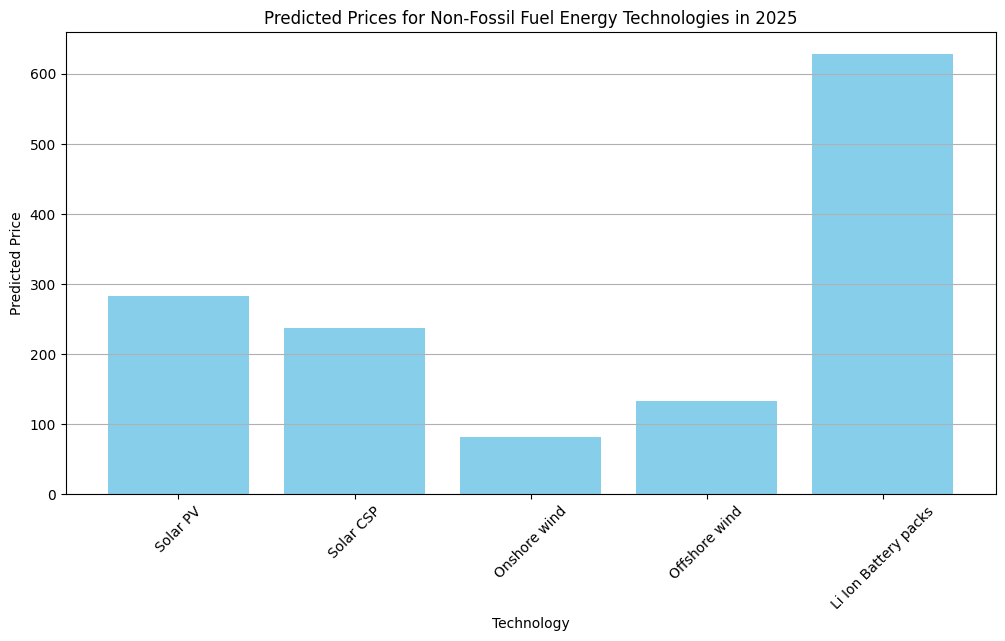

In [29]:
# install some packages to create linear regression models and impute missing values in the dataset
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# impute missing values using median and make a copy
imputer = SimpleImputer(strategy='median')
energy_prices_imputed = energy_prices.fillna(energy_prices.median()).copy()

# select features and target
x = energy_prices_imputed[['Year']].copy()
y = energy_prices_imputed.drop(['Year'], axis=1).copy()

# fit linear regression models for each technology
models = {}
for column in y.columns:
    lr = LinearRegression(fit_intercept=False)
    lr.fit(x, y[column])  
    models[column] = lr

# predict prices for the year 2025
predicted_prices = {}
for tech, model in models.items():
    predicted_prices[tech] = model.predict([[2025]])

# separate keys (sources) and values (predicted prices)
sources = list(predicted_prices.keys())
prices = [predicted_prices[tech][0] for tech in sources]

# plot the bar graph
mpl.figure(figsize=(12, 6))
mpl.bar(sources, prices, color='skyblue')
mpl.title('Predicted Prices for Non-Fossil Fuel Energy Technologies in 2025')
mpl.xlabel('Technology')
mpl.ylabel('Predicted Price')
mpl.xticks(rotation=45)
mpl.grid(axis='y')
mpl.show()

The model predict that in 2025 onshore wind has the lowest price and is thus the best on-fossil fuel energy source in the future in terms of price! Moreover, it is best to stay away from using Li Ion batteries since they will be very expensive. Probably because the increase in demand for electric car batteries. So start building those wind turbines!!

## --- THE END ---